<a href="https://colab.research.google.com/github/CodeChamp-SS/K-means-Clustering/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

Dataset Preparation

In [ ]:
x,y = make_blobs(n_samples=1000, n_features=2, centers=5,random_state=10)

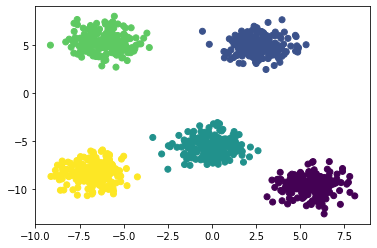

In [ ]:
plt.figure(0)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [ ]:
k = 5
colors = ["blue", "red", "green", "yellow", "orange"]
clusters = {}

for i in range(k):
  centre = 10 * (2 * np.random.random((x.shape[1],)) - 1)
  points = []
  cluster = {
      'centre': centre,
      'points': points,
      'color': colors[i]
  }
  clusters[i] = cluster

In [ ]:
clusters

{0: {'centre': array([7.727175  , 1.64734005]), 'color': 'blue', 'points': []},
 1: {'centre': array([-1.99420639,  7.67587202]),
  'color': 'red',
  'points': []},
 2: {'centre': array([ 6.07719369, -6.28731305]),
  'color': 'green',
  'points': []},
 3: {'centre': array([-9.97936044, -1.08562535]),
  'color': 'yellow',
  'points': []},
 4: {'centre': array([-2.40223661,  8.43196567]),
  'color': 'orange',
  'points': []}}

In [ ]:
def dist(p1, p2):
  return np.sqrt(np.sum((p1 - p2)**2))

In [ ]:
# Assigning data points to clusters

def createCluster(clusters):
  for i in range(x.shape[0]):
    dist_arr = []
    cur_x = x[i]
    for j in range(k):
      d = dist(cur_x, clusters[j]['centre'])
      dist_arr.append(d)
    
    cur_cluster = np.argmin(dist_arr)
    clusters[cur_cluster]['points'].append(cur_x)

def updateClusters(clusters):
  for i in range(k):
    pts = np.array(clusters[i]['points'])
    if pts.shape[0] != 0:
      u = np.mean(pts, axis=0)
      clusters[i]['centre'] = u
      clusters[i]['points'] = []

def plotClusters(clusters):
  for i in range(k):
    pts = np.array(clusters[i]['points'])
    if pts.shape[0] != 0:
      plt.scatter(pts[:,0], pts[:,1], color = clusters[i]['color'])
    
    # plot the cluster centres
    u = clusters[i]['centre']
    plt.scatter(u[0], u[1], color='black', marker='*')

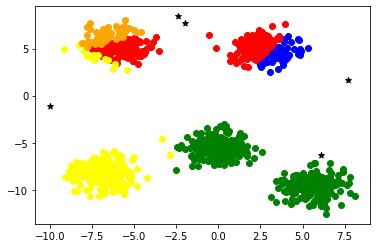

In [ ]:
# createCluster(clusters)
plotClusters(clusters)

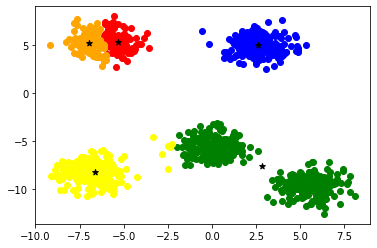

In [ ]:
# after few iterations, the cluster centres converge
createCluster(clusters)
plotClusters(clusters)
updateClusters(clusters)